<a href="https://colab.research.google.com/github/gunelatakishyeva/MachineLearningProjects/blob/main/Weather_type_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/weather_classification_data.csv')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [32]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

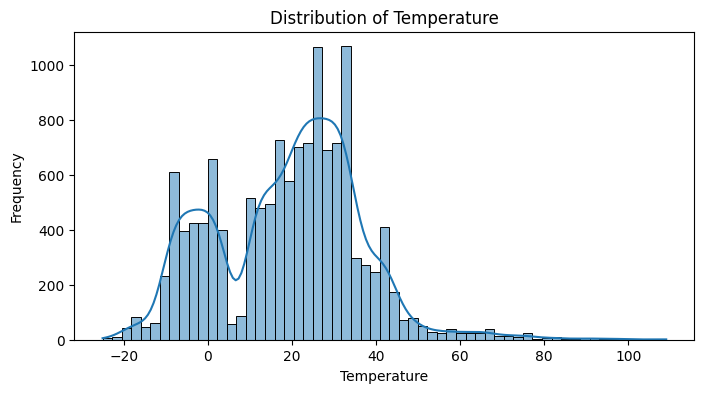

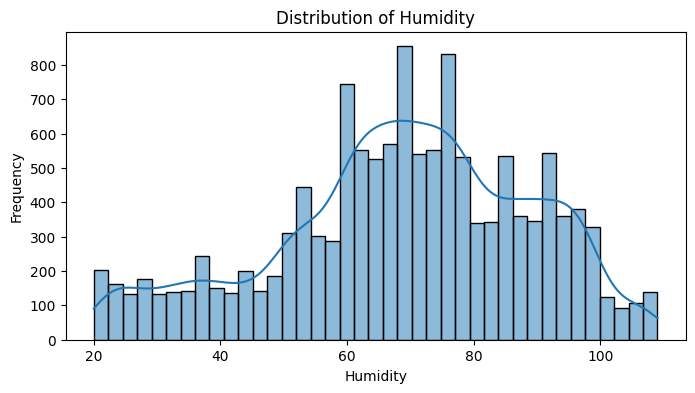

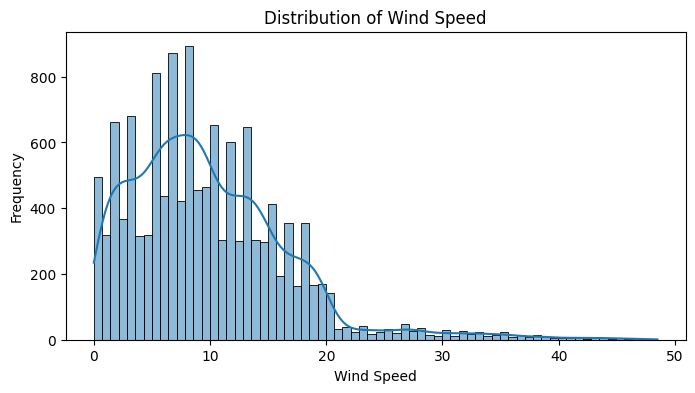

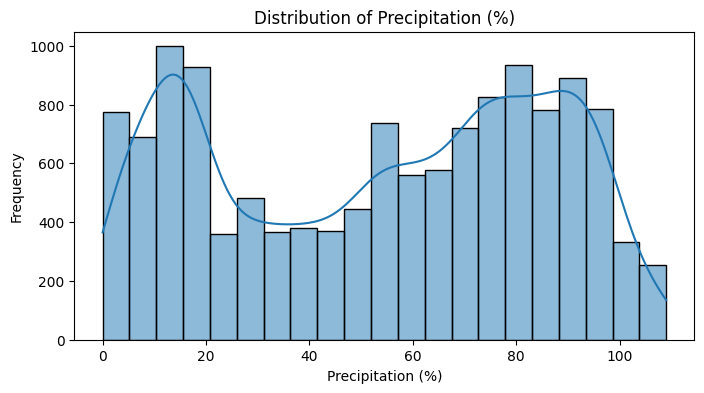

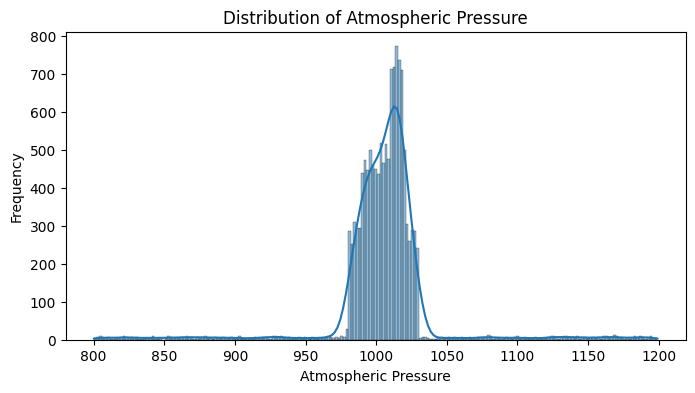

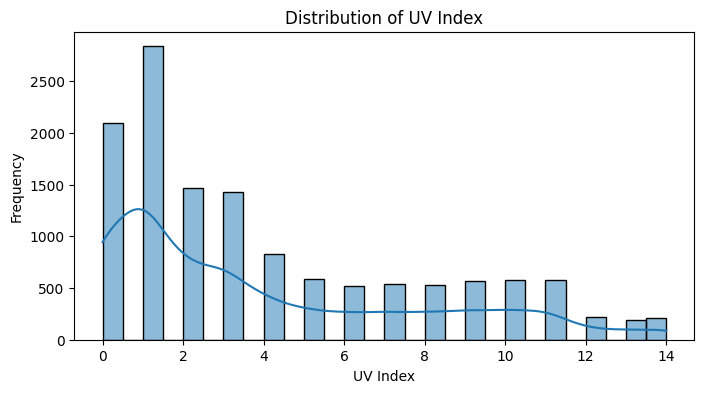

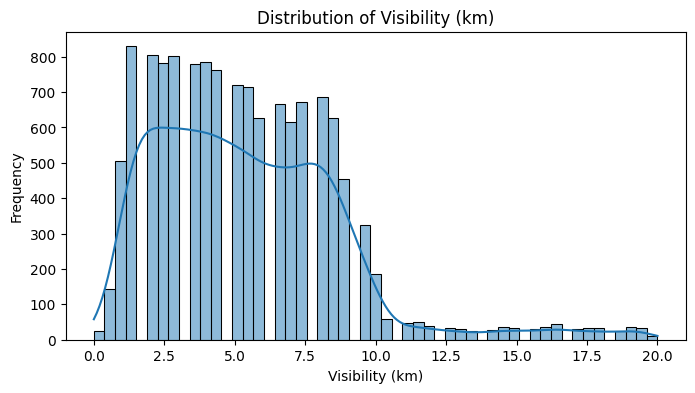

In [41]:
Numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in Numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

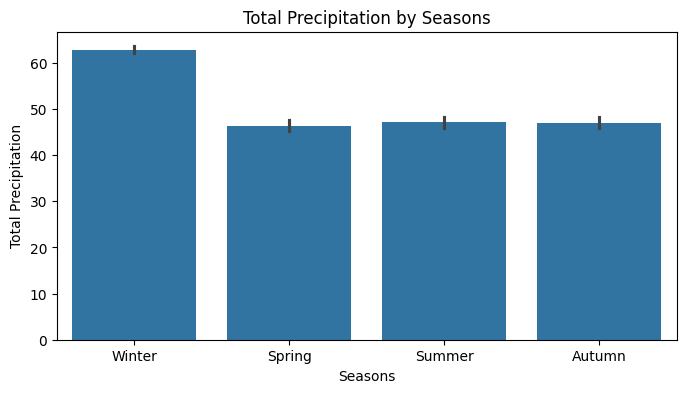

In [40]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.barplot(x='Season', y='Precipitation (%)',data=df)
plt.title('Total Precipitation by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Precipitation')
plt.show()

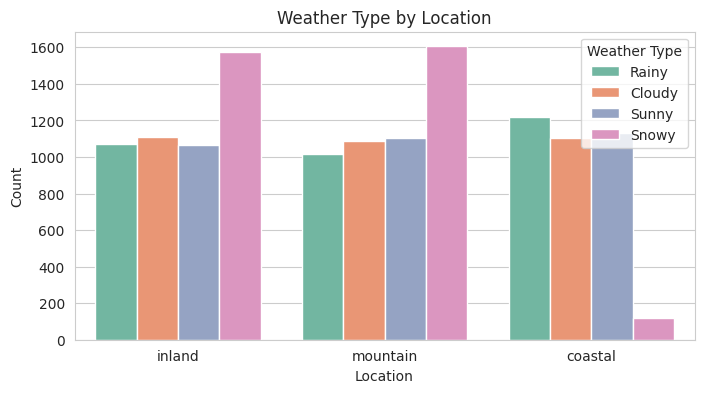

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Location', hue='Weather Type', palette='Set2')
ax.set_title('Weather Type by Location')
ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.legend(title='Weather Type')
plt.show()

In [4]:
X=df.drop('Weather Type',axis=1)
y=df['Weather Type'].copy()

In [6]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [7]:
num_features=X_train.select_dtypes(include=[np.number]).columns
cat_features=X_train.select_dtypes(exclude=[np.number]).columns

In [8]:
num_features

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')

In [9]:
cat_features

Index(['Cloud Cover', 'Season', 'Location'], dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [14]:
num_pipeline=make_pipeline(StandardScaler())
cat_pipeline=make_pipeline(OneHotEncoder(handle_unknown='ignore'))

transformer=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_features),
    ('cat_pipeline',cat_pipeline,cat_features)
],remainder='passthrough')

In [15]:
X_transformed_train=transformer.fit_transform(X_train)
X_transformed_test=transformer.transform(X_test)
X_transformed_valid=transformer.transform(X_valid)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [17]:
rnd_clf=RandomForestClassifier()
rnd_clf.fit(X_transformed_train,y_train)

RandomForestClassifier()

In [18]:
rnd_clf.score(X_transformed_test,y_test)

0.9087121212121212

In [19]:
rnd_clf.score(X_transformed_train,y_train)

1.0

In [20]:
rnd_clf.score(X_transformed_valid,y_valid)

0.9113636363636364

In [21]:
svm_clf=SVC()
svm_clf.fit(X_transformed_train,y_train)

SVC()

In [22]:
svm_clf.score(X_transformed_test,y_test)

0.9015151515151515

In [23]:
svm_clf.score(X_transformed_train,y_train)

0.9506313131313131

In [24]:
svm_clf.score(X_transformed_valid,y_valid)

0.9022727272727272

In [29]:
lin_reg=LogisticRegression(max_iter=10_000)
lin_reg.fit(X_transformed_train,y_train)
lin_reg.score(X_transformed_test,y_test)

0.8727272727272727

In [30]:
lin_reg.score(X_transformed_valid,y_valid)

0.859469696969697

In [31]:
lin_reg.score(X_transformed_train,y_train)

0.878030303030303

In [37]:
vot_clf=VotingClassifier(
    estimators=[
        ('lin_reg',lin_reg),
        ('rnd_clf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42))
    ]
)

vot_clf.fit(X_transformed_train,y_train)

VotingClassifier(estimators=[('lin_reg', LogisticRegression(max_iter=10000)),
                             ('rnd_clf',
                              RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [38]:
vot_clf.score(X_transformed_test,y_test)

0.906439393939394